<h1 style="text-align:center;">TF2202 Teknik Komputasi - Interpolasi</h1>

<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
#matplotlib.style.use("dark_background")
matplotlib.style.use("default")

# Interpolasi dengan polinomial Lagrange

## Teori polinomial Lagrange

Polinomial Lagrange didefinisikan sebagai:
$$
P_n(x) = \sum_{i=0}^{n} y_{i} L_{i}(x)
$$
Polinomial ini adalah interpolant yang memiliki derajat $n$ dan melewati $(n+1)$ titik data atau pasangan $(x_{i},y_{i})$ dan $L_{i}(x)$ adalah fungsi polinomial dengan bentuk:
$$
L_{i}(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n}
\frac{x - x_{j}}{x_{i} - x_{j}}
$$

Catatan: pada buku Kiusalaas persamaan ini typo. Pada buku Chapra, syarat hasil kali juga memiliki typo.

## Implementasi interpolasi Lagrange

In [4]:
def lagrange_interp(x, y, xx):
    
    assert len(x) == len(y)
    
    # Jumlah data adalah N + 1 dan derajat polynomial adalah N
    # atau:
    # Jumlah data adalah N dan derajat polynomial adalah N - 1
    N = len(x) - 1

    yy = 0.0
    for i in range(N+1):
        # Evaluasi fungsi kardinal
        Li = 1.0 # inisialisasi ke ke 1.0
        for j in range(N+1):
            if i != j:
                Li = Li * (xx - x[j])/(x[i] - x[j])
        yy = yy + y[i]*Li
    return yy

### Contoh

Sebagai contoh, diberikan data sebagai berikut:

| $x_{i}$ | $y_{i}$             |
| ------- | ------------------ |
| 1       | 0                  |
| 4       | 1.386294 |
| 6       | 1.791760 |


In [5]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])

Sebagai contoh, kita ingin mengetahui berapa nilai $y$ jika $x=2$:

In [6]:
lagrange_interp(x, y, 2.0)

0.5658439999999999

In [6]:
NptsPlot = 1000
xx = np.linspace(x[0], x[-1], NptsPlot)
yy = np.zeros(NptsPlot)
for i in range(NptsPlot):
    yy[i] = lagrange_interp(x, y, xx[i])

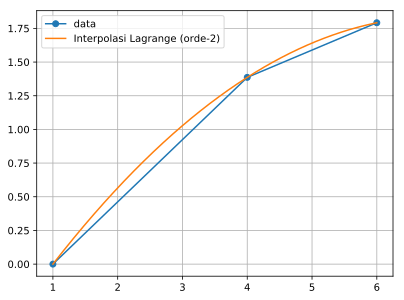

In [7]:
plt.clf()
plt.plot(x, y, marker="o", label="data")
plt.plot(xx, yy, label="Interpolasi Lagrange (orde-2)")
plt.grid()
plt.legend()

# Interpolasi dengan polinomial Newton

## Teori polinomial Newton

Polinomial Newton memiliki bentuk sebagai berikut:

$$
P_{n} = a_{0} + (x - x_{0}) a_{1} + (x - x_{0}) (x - x_{1}) a_{2} + \cdots + (x - x_{0})(x - x_{1}) \cdots (x - x_{n-1}) a_{n}
$$

Koefisien $a_{n}$ dapat dihitung dengan:
$$
\begin{align*}
a_{0} & = f(x_0) \\
a_{1} & = f[x_1,x_0] \\
a_{2} & = f[x_2, x_1, x_0] \\
\vdots \\
a_{n} & = f[x_n, x_{n-1}, \ldots, x_1, x_0]
\end{align*}
$$
di mana fungsi dengan tanda kurung siku merupakan beda terbagi hingga (*finite divided differences*).

Beda terbagi hingga pertama didefinisikan sebagai:
$$
f[x_{i},x_{j}] = \frac{f(x_i) - f(x_j)}{x_i - x_j}
$$
Beda terbagi hingga kedua didefinisikan sebagai:
$$
f[x_{i},x_{j},x_{k}] = \frac{f[x_{i},x_{j}] - f[x_{j},f_{k}]}{x_i - x_k}
$$
Secara umum, untuk beda terbagi hingga ke-$n$ adalah:
$$
f[x_{n},x_{n-1},\ldots,x_{1},x_{0}] =
\frac{f[x_{n},x_{n-1},\ldots,x_{1}]- f[x_{n-1},x_{n-2},\ldots,x_{0}] }{x_n - x_0}
$$

## Implementasi interpolasi Newton

In [8]:
def create_newton_polynom(x, y):
    Ndata = len(x) # jumlah data
    coefs = np.copy(y)
    for k in range(1,Ndata):
        coefs[k:Ndata] = (coefs[k:Ndata] - coefs[k-1])/(x[k:Ndata] - x[k-1])
    return coefs

def eval_newton_polynom(coefs, x, xo):
    N = len(x) - 1 # derajat polinom
    p = coefs[N]
    for k in range(1,N+1):
        p = coefs[N-k] + (xo - x[N-k])*p
    return p

### Contoh penggunaan interpolasi Newton

In [9]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])

In [10]:
coefs = create_newton_polynom(x, y)
coefs

array([ 0.      ,  0.462098, -0.051873])

In [11]:
eval_newton_polynom(coefs, x, 2.0)

0.5658439999999999

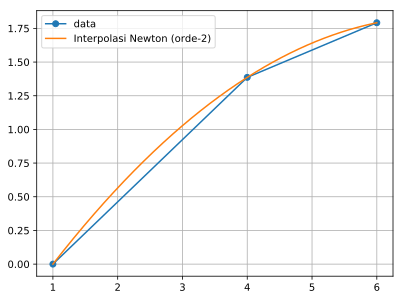

In [12]:
NptsPlot = 1000
xx = np.linspace(x[0], x[-1], NptsPlot)
yy = np.zeros(NptsPlot)
coefs = create_newton_polynom(x, y)
for i in range(NptsPlot):
    yy[i] = eval_newton_polynom(coefs, x, xx[i])

# Plot
plt.clf()
plt.plot(x, y, marker="o", label="data")
plt.plot(xx, yy, label="Interpolasi Newton (orde-2)")
plt.grid()
plt.legend();

### Aplikasi interpolasi Newton pada fungsi $\cos$

In [13]:
def func_01(x):
    return np.cos(2*x)

In [14]:
N = 5
A = 0.0
B = 2*np.pi
x_sample = np.linspace(A, B, N)
y_sample = func_01(x_sample)

In [15]:
x_sample

array([0.        , 1.57079633, 3.14159265, 4.71238898, 6.28318531])

In [16]:
y_sample

array([ 1., -1.,  1., -1.,  1.])

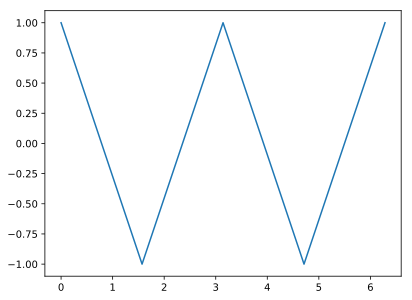

In [17]:
plt.clf()
plt.plot(x_sample, y_sample);

In [18]:
NptsPlot = 500
x_dense = np.linspace(A,B,NptsPlot)
y_dense = func_01(x_dense)

Ninterp = 10
x_interp = np.linspace(A,B,Ninterp)
y_interp = func_01(x_interp)
coefs = create_newton_polynom(x_interp, y_interp)

x_interp_plt = np.linspace(A,B,NptsPlot)
y_interp_plt = np.zeros(NptsPlot)
for i in range(NptsPlot):
    y_interp_plt[i] = eval_newton_polynom(coefs, x_interp, x_interp_plt[i])

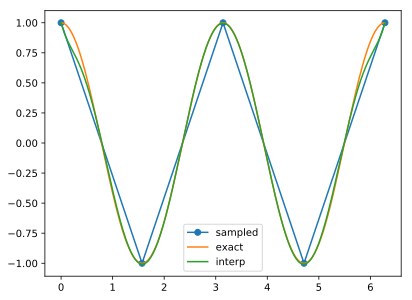

In [19]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o", label="sampled")
plt.plot(x_dense, y_dense, label="exact")
plt.plot(x_interp_plt, y_interp_plt, label="interp")
plt.legend()

## Latihan dengan fungsi yang lain

In [20]:
def func_02(x):
    return np.exp(-x**2)

In [41]:
N = 11
A = -5
B = 5
x_sample = np.linspace(A, B, N)
y_sample = func_02(x_sample)

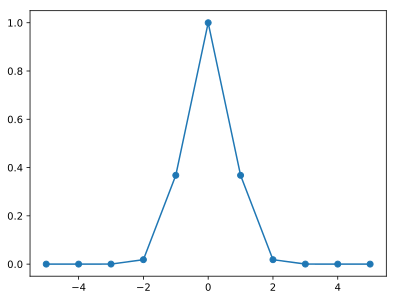

In [42]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o");

In [43]:
NptsPlot = 1000
xx = np.linspace(A, B, NptsPlot)
yy = np.zeros(NptsPlot)
for i in range(NptsPlot):
    yy[i] = lagrange_interp(x_sample, y_sample, xx[i])

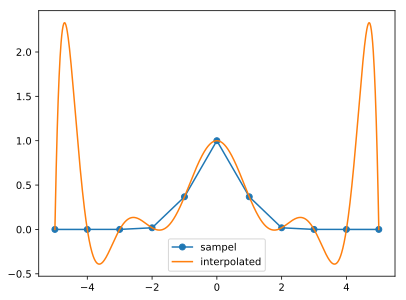

In [44]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o", label="sampel")
plt.plot(xx, yy, label="interpolated");
plt.legend()

### Fungsi Gaussian dengan interp1d

In [46]:
NptsPlot = 1000
xx = np.linspace(A, B, NptsPlot)

f_slinear = scipy.interpolate.interp1d(x_sample, y_sample, kind="slinear")
f_quadratic = scipy.interpolate.interp1d(x_sample, y_sample, kind="quadratic")
f_cubic = scipy.interpolate.interp1d(x_sample, y_sample, kind="cubic")

yy_slinear = f_slinear(xx)
yy_quadratic = f_quadratic(xx)
yy_cubic = f_cubic(xx)

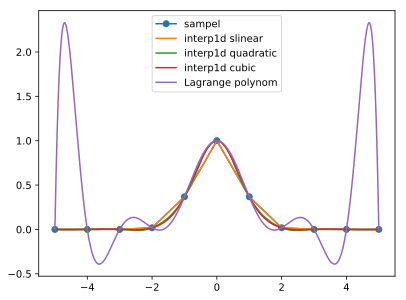

In [49]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o", label="sampel")
plt.plot(xx, yy_slinear, label="interp1d slinear")
plt.plot(xx, yy_quadratic, label="interp1d quadratic")
plt.plot(xx, yy_cubic, label="interp1d cubic")
plt.plot(xx, yy, label="Lagrange polynom");
plt.legend();

### Kiusalaas 3.1 no. 4

In [51]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([-1.00, 1.75, 4.00, 5.75, 7.00])

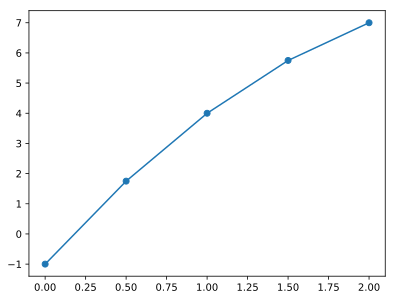

In [52]:
plt.clf()
plt.plot(x, y, marker="o")

Nilai fungsi pada $x = \pi/4$ adalah

In [53]:
lagrange_interp(x, y, np.pi/4)

3.0955387053166046

In [54]:
np.pi/4

0.7853981633974483

### Kiusalaas 3.1 no 5

In [56]:
x = np.array([0, 0.5, 1, 1.5, 2])
y = np.array([-0.7854, 0.6529, 1.7390, 2.2071, 1.9425])

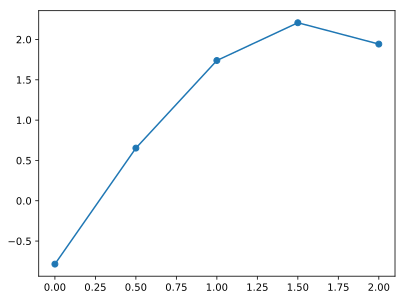

In [57]:
plt.clf()
plt.plot(x, y, marker="o")

Nilai fungsi pada $x=\pi/4$ adalah

In [59]:
lagrange_interp(x, y, np.pi/4)

1.3364947265058855

Nilai fungsi pada $x = \pi/2$

In [60]:
lagrange_interp(x, y, np.pi/2)

2.2149439701239673

In [62]:
neville_interp(x, y, np.pi/2)

2.2149439701239673

Dengan menggunakan `interp1d`

In [64]:
f_cubic = scipy.interpolate.interp1d(x, y, kind="cubic")

In [71]:
f_cubic([np.pi/2])[0]

2.2159412331093766

In [72]:
type(f_cubic(0.1))

numpy.ndarray

In [74]:
res = f_cubic(0.1)

In [81]:
res.item()

-0.4841356

# Metode Neville

Metode ini pada dasarnya merupakan bentuk alternatif dari polinomial Newton.

## Implementasi metode Neville

In [61]:
def neville_interp(x, y_, xx):
    m = len(x)
    y = np.copy(y_)
    for k in range(1,m):
        y[0:m-k] = ((xx- x[k:m])*y[0:m-k] + (x[0:m-k] - xx)*y[1:m-k+1])/(x[0:m-k] - x[k:m])
    return y[0]

### Contoh penggunaan metode Neville

In [18]:
x = np.array([1.0, 4.0, 6.0])
y = np.array([0, 1.386294, 1.791760])
neville_interp(x, y, 2.0)

0.5658439999999999

# Interpolasi dengan fungsi rasional

Aproksimasi ini baik digunakan untuk fungsi yang memiliki pole, akan tetapi pada beberapa jenis data atau fungsi interpolasi ini tidak stabil.

### Implementasi dalam Python

In [19]:
def rational_interp(x, y, xx):
    m = len(x)
    r = np.copy(y)
    rOld = np.zeros(m)
    #SMALL = np.finfo("float64").eps
    SMALL = 1e-8
    for k in range(m-1):
        for i in range(m-k-1):
            if (abs(xx - x[i+k+1]) < SMALL):
                return y[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (xx - x[i])/(xx - x[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]
    return r[0]

### Contoh penggunaan interpolasi fungsi rasional

In [20]:
x = np.array([0.0, 0.6, 0.8, 0.95])
y = np.array([0.0, 1.3764, 3.0777, 12.7062])

In [21]:
rational_interp(x, y, 0.5)

1.0131205116558464

In [22]:
x = np.array([0.1, 0.2, 0.5, 0.6, 0.8, 1.2, 1.5])
y = np.array([-1.5342, -1.0811, -0.4445, -0.3085, -0.0868, 0.2281, 0.3824])

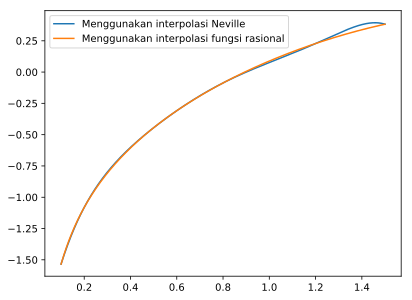

In [29]:
NptsPlot = 500
A = 0.1
B = 1.5
x_plot = np.linspace(0.1, 1.5, NptsPlot)
y_neville = np.zeros(NptsPlot)
y_rational = np.zeros(NptsPlot)
for i in range(NptsPlot):
    y_neville[i] = neville_interp(x, y, x_plot[i])
    y_rational[i] = rational_interp(x, y, x_plot[i])
plt.clf()
plt.plot(x_plot, y_neville, label="Menggunakan interpolasi Neville")
plt.plot(x_plot, y_rational, label="Menggunakan interpolasi fungsi rasional")
plt.legend();

### Tes fungsi $x^2$

In [24]:
def func_02(x):
    return x**2 - 3.0

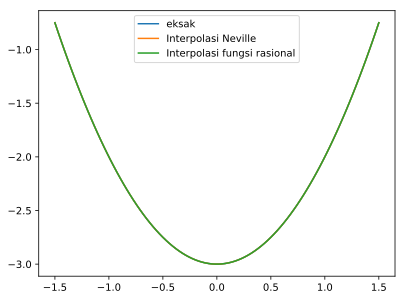

In [30]:
A = -1.5
B = 1.5

Nsample = 5
x_sample = np.linspace(A, B, Nsample)
y_sample = func_02(x_sample)
    
NptsPlot = 100
x_plot = np.linspace(A, B, NptsPlot)
y_exact = func_02(x_plot)
y_neville = np.zeros(NptsPlot)
y_rational = np.zeros(NptsPlot)
for i in range(NptsPlot):
    y_neville[i] = neville_interp(x_sample, y_sample, x_plot[i])
    y_rational[i] = rational_interp(x_sample, y_sample, x_plot[i])
plt.clf()
plt.plot(x_plot, y_exact, label="eksak")
plt.plot(x_plot, y_neville, label="Interpolasi Neville")
plt.plot(x_plot, y_rational, label="Interpolasi fungsi rasional")
plt.legend();

### Tes fungsi $x^3$

In [26]:
def func_03(x):
    return x**3 - 3.0

/home/efefer/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/home/efefer/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


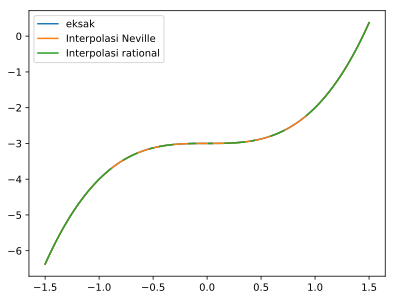

In [31]:
A = -1.5
B = 1.5

Nsample = 10
x_sample = np.linspace(A, B, Nsample)
y_sample = func_03(x_sample)
    
NptsPlot = 100
x_plot = np.linspace(A, B, NptsPlot)
y_exact = func_03(x_plot)
y_neville = np.zeros(NptsPlot)
y_rational = np.zeros(NptsPlot)
for i in range(NptsPlot):
    y_neville[i] = neville_interp(x_sample, y_sample, x_plot[i])
    y_rational[i] = rational_interp(x_sample, y_sample, x_plot[i])
plt.clf()
plt.plot(x_plot, y_exact, label="eksak")
plt.plot(x_plot, y_neville, label="Interpolasi Neville")
plt.plot(x_plot, y_rational, label="Interpolasi rational")
plt.legend();

# Interpolasi dengan spline

TODO.

Merupakan metode yang dianggap paling robus dan banyak digunakan dalam aplikasi. Implementasinya cukup rumit untuk dilakukan.

# Menggunakan pustaka Python

Module `scipy.interpolate` menyediakan banyak fungsi untuk melakukan interpolasi. Informasi lebih lengkap dapat dilihat pada [dokumentasinya](https://docs.scipy.org/doc/scipy/reference/interpolate.html).

Beberapa fungsi yang sering dipakai adalah:
- fungsi `interp1d` 
- `splrep` dan `splev` (menggunakan metode B-spline)

In [45]:
import scipy.interpolate

Buat data dengan menggunakan fungsi yang sudah kita ketahui bentuknya.

In [39]:
A = 0.0
B = np.pi
Nsample = 7
x_sample = np.linspace(A,B,Nsample)
y_sample = func_01(x_sample)

Buat interpolant, dengan menggunakan spline linear, kuadratic, dan kubik.

In [48]:
f_slinear = scipy.interpolate.interp1d(x_sample, y_sample, kind="slinear")
f_quadratic = scipy.interpolate.interp1d(x_sample, y_sample, kind="quadratic")
f_cubic = scipy.interpolate.interp1d(x_sample, y_sample, kind="cubic")

In [49]:
NptsPlot = 500
x_plot = np.linspace(A,B,NptsPlot)
y_slinear = f_slinear(x_plot)
y_quadratic = f_quadratic(x_plot)
y_cubic = f_cubic(x_plot)

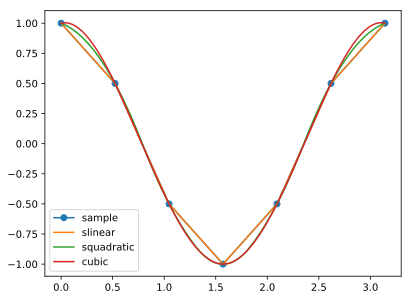

In [54]:
plt.clf()
plt.plot(x_sample, y_sample, marker="o", label="sample")
plt.plot(x_plot, y_slinear, label="slinear")
plt.plot(x_plot, y_quadratic, label="squadratic")
plt.plot(x_plot, y_cubic, label="cubic")
plt.legend();